<a href="https://colab.research.google.com/github/RomanKhakhula/GoIT-Final-Project/blob/main/GoIT_Final_Project_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
init_data_df = pd.read_csv('/content/drive/My Drive/internet_service_churn.csv')
# init_data_df.head()
init_data_df.set_index(['id'], inplace = True)
init_data_df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
id,,,,,,,,,,
15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
init_data_df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [ ]:
discrete_initial = ['is_tv_subscriber', 'is_movie_package_subscriber', 'service_failure_count', 'download_over_limit']
continuous_initial = ['subscription_age', 'bill_avg', 'reamining_contract', 'download_avg', 'upload_avg']

In [ ]:
def describe_features(feature, x_dev, dev, x_prob, prob):
  fig = plt.figure(figsize=(15, 3))

  plt.subplot(1, 2, 1)
  plt.bar(x_dev, dev)
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.plot(x_prob, prob, marker = 'o', markersize = 5)
  plt.xlabel(feature)
  plt.ylabel('avg prob of churn')
  plt.grid(True)

  plt.show()

In [ ]:
def analyse_discrete_features(df: pd.DataFrame, list_of_features: list, target_column: chr):
  for feature in list_of_features:
    print(f'{feature} (describe)' + ' *'*50)
    display(pd.DataFrame([list(df[feature].describe().values) + [(df[feature].isnull().sum() / df.shape[0])]], columns = list(df[feature].describe().index) + ['part of NaN'], index = None))
    print('\n')

    print(f'{feature} (frequency / avg prob of {target_column})' + ' *'*50)
    agg_df = df.groupby([feature]).agg({target_column: ['count', 'mean']})
    display(agg_df.T)
    print('\n')

    describe_features(feature, agg_df.index, agg_df[target_column, 'count'], agg_df.index, agg_df[target_column, 'mean'])
    print('\n'*2)

In [ ]:
def analyse_continuous_features(df: pd.DataFrame, list_of_features: list, target_column: chr):
  for feature in list_of_features:
    df.sort_values(feature, inplace = True, na_position = 'first')
    df[f'{feature}_gr'] = -2
    df.loc[df[feature].isna(), f'{feature}_gr'] = -1 #NaN
    df.loc[df[feature] == 0, f'{feature}_gr'] = 0
    rest_shape = df.loc[df[f'{feature}_gr'] == -2].shape[0]
    df.loc[df[f'{feature}_gr'] == -2, f'{feature}_gr'] = [(i // (rest_shape / 10)) + 1 for i in range(rest_shape)]

    print(f'{feature} (describe)' + ' *'*50)
    display(pd.DataFrame([list(df[feature].describe().values) + [(df[feature].isnull().sum() / df.shape[0])]], columns = list(df[feature].describe().index) + ['part of NaN'], index = None))
    print('\n')

    print(f'{feature} (frequency / avg prob of {target_column})' + ' *'*50)
    agg_df1 = df.groupby([f'{feature}_gr']).agg({target_column: ['count', 'mean'], feature: ['min','max','mean']})
    agg_df2 = df.groupby([feature]).agg({target_column: ['count']})
    display(agg_df1.T)
    print('\n')

    describe_features(feature, agg_df2.index, agg_df2[target_column, 'count'], agg_df1[feature, 'mean'], agg_df1['churn', 'mean'])
    print('\n'*2)

is_tv_subscriber (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.815259,0.38809,0.0,1.0,1.0,1.0,1.0,0.0




is_tv_subscriber (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


is_tv_subscriber             0            1
churn count       13352.000000  58922.00000
      mean            0.896195      0.47663

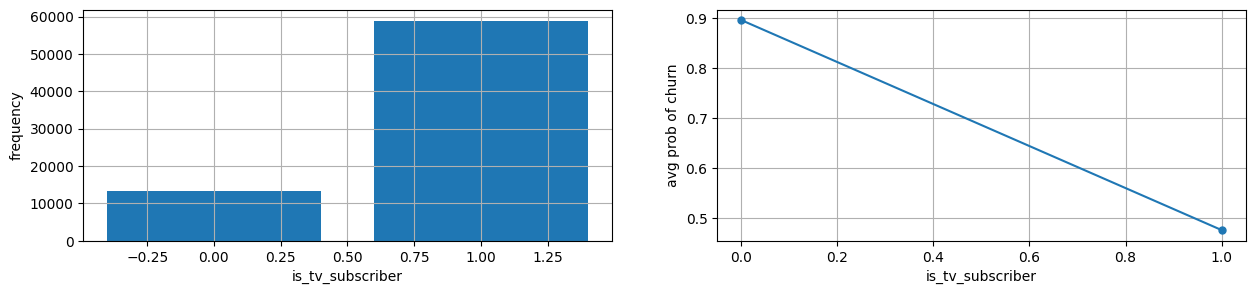




is_movie_package_subscriber (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.334629,0.471864,0.0,0.0,0.0,1.0,1.0,0.0




is_movie_package_subscriber (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


is_movie_package_subscriber             0             1
churn count                  48089.000000  24185.000000
      mean                       0.662418      0.338846

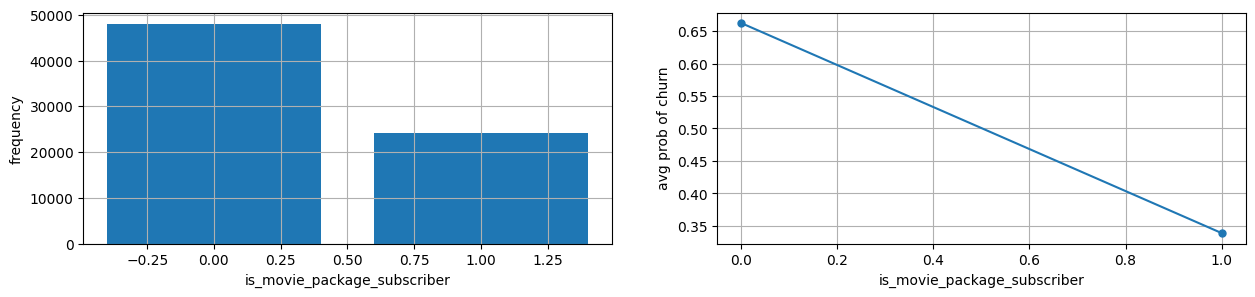




service_failure_count (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.274234,0.816621,0.0,0.0,0.0,0.0,19.0,0.0




service_failure_count (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count           0            1            2           3   \
churn count            60407.00000  7665.000000  2453.000000  901.000000   
      mean                 0.55232     0.543118     0.592336    0.570477   

service_failure_count          4           5          6          7   \
churn count            395.000000  201.000000  97.000000  58.000000   
      mean               0.643038    0.641791   0.690722   0.706897   

service_failure_count         8          9          10        11        12  \
churn count            37.000000  17.000000  15.000000  6.000000  6.000000   
      mean              0.621622   0.823529   0.666667  0.666667  0.333333   

service_failure_count   13    14   15        16   18   19  
churn count            5.0  4.00  2.0  3.000000  1.0  1.0  
      mean             0.8  0.75  1.0  0.333333  1.0  1.0

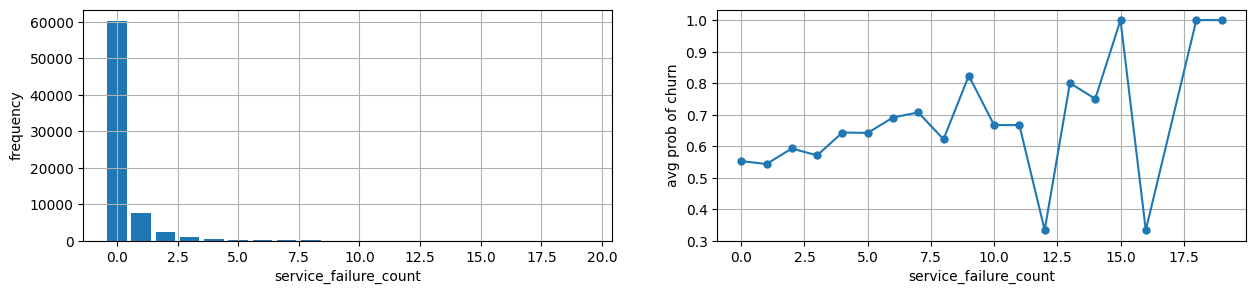




download_over_limit (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.207613,0.997123,0.0,0.0,0.0,0.0,7.0,0.0




download_over_limit (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit             0           1         2           3  \
churn count          68373.000000  766.000000  560.0000  498.000000   
      mean               0.535284    0.736292    0.8125    0.895582   

download_over_limit           4           5           6           7  
churn count          456.000000  429.000000  688.000000  504.000000  
      mean             0.929825    0.925408    0.962209    0.998016

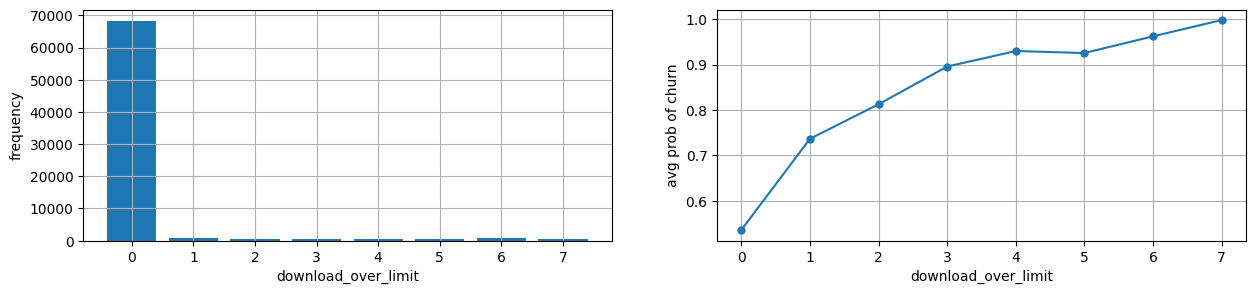

In [ ]:
 analyse_discrete_features(init_data_df, discrete_initial, 'churn')

*   is_tv_subscriber, is_movie_package_subscriber - без змін
*   service_failure_count - групуємо 4+, OneHotEncod-имо
*   download_over_limit - OneHotEncod-имо


In [ ]:
work_df = init_data_df

for n in range(4):
  work_df[f'service_failure_count_{n}'] = [1 if n == el  else 0 for el in list(work_df['service_failure_count'])]
work_df[f'service_failure_count_4'] = [1 if el >= 4  else 0 for el in list(work_df['service_failure_count'])]

for n in range(8):
  work_df[f'download_over_limit_{n}'] = [1 if n == el  else 0 for el in list(work_df['download_over_limit'])]

subscription_age (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,2.450051,2.03499,-0.02,0.93,1.98,3.3,12.8,0.0




subscription_age (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


subscription_age_gr           0.0          1.0          2.0          3.0   \
churn            count  278.000000  7200.000000  7200.000000  7199.000000   
                 mean     0.866906     0.422361     0.603750     0.552855   
subscription_age min      0.000000    -0.020000     0.410000     0.770000   
                 max      0.000000     0.410000     0.770000     1.080000   
                 mean     0.000000     0.197329     0.601722     0.932477   

subscription_age_gr            4.0          5.0          6.0          7.0   \
churn            count  7200.000000  7200.000000  7199.000000  7200.000000   
                 mean      0.581528     0.664583     0.742464     0.591944   
subscription_age min       1.080000     1.530000     1.980000     2.330000   
                 max       1.530000     1.980000     2.330000     2.960000   
                 mean      1.283318     1.791110     2.111710     2.647336   

subscription_age_gr            8.0          9.0          10.0  
churn            count  7199.000000  7200.000000  7199.000000  
                 mean      0.540353     0.540417     0.289068  
subscription_age min       2.960000     3.900000     5.680000  
                 max       3.900000     5.680000    12.800000  
                 mean      3.360244     4.632597     7.037773

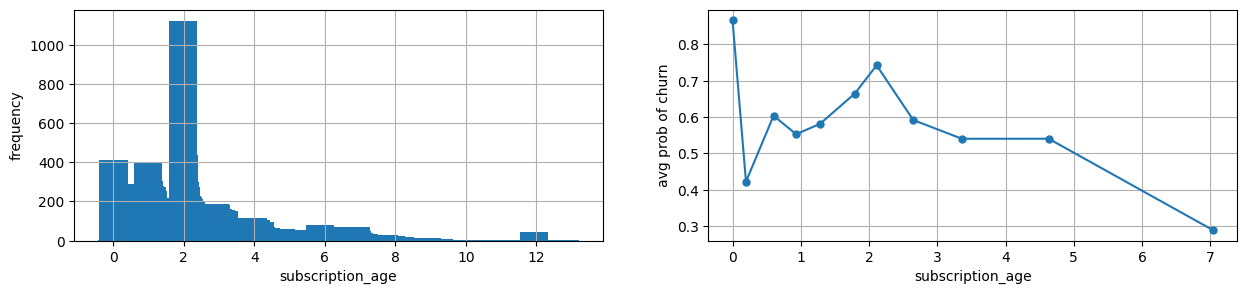




bill_avg (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,18.942483,13.215386,0.0,13.0,19.0,22.0,406.0,0.0




bill_avg (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


bill_avg_gr            0.0          1.0          2.0          3.0   \
churn    count  5173.000000  6711.000000  6710.000000  6710.000000   
         mean      0.926542     0.551036     0.355887     0.363338   
bill_avg min       0.000000     1.000000    12.000000    13.000000   
         max       0.000000    12.000000    13.000000    15.000000   
         mean      0.000000     8.485323    12.385097    14.105663   

bill_avg_gr            4.0          5.0          6.0          7.0   \
churn    count  6710.000000  6710.000000  6710.000000  6710.000000   
         mean      0.456632     0.591803     0.501043     0.509091   
bill_avg min      15.000000    18.000000    20.000000    21.000000   
         max      18.000000    20.000000    21.000000    22.000000   
         mean     16.090462    18.932936    20.520417    21.669001   

bill_avg_gr            8.0          9.0          10.0  
churn    count  6710.000000  6710.000000  6710.000000  
         mean      0.727869     0.574665     0.622951  
bill_avg min      22.000000    24.000000    29.000000  
         max      24.000000    29.000000   406.000000  
         mean     22.935469    25.461252    43.444262

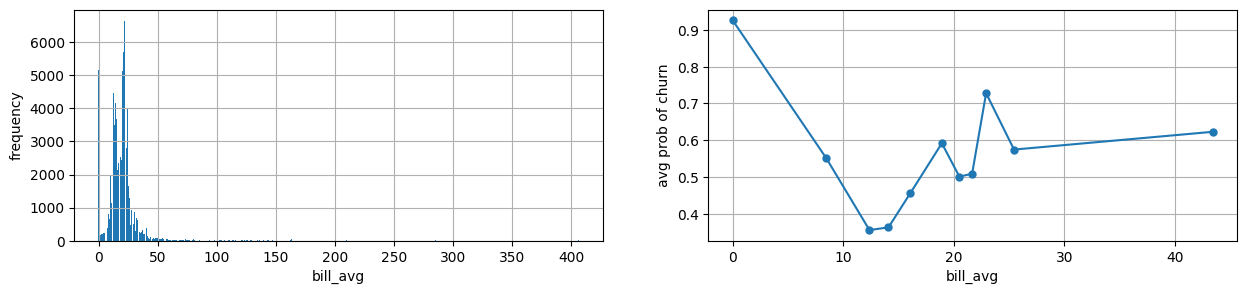




reamining_contract (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,50702.0,0.716039,0.697102,0.0,0.0,0.57,1.31,2.92,0.298475




reamining_contract (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


reamining_contract_gr            -1.0         0.0          1.0          2.0   \
churn              count  21572.000000  16363.0000  3434.000000  3434.000000   
                   mean       0.914102      0.9956     0.214619     0.098427   
reamining_contract min             NaN      0.0000     0.010000     0.170000   
                   max             NaN      0.0000     0.170000     0.420000   
                   mean            NaN      0.0000     0.076503     0.291360   

reamining_contract_gr            3.0          4.0          5.0          6.0   \
churn              count  3434.000000  3434.000000  3434.000000  3434.000000   
                   mean      0.154921     0.093477     0.089109     0.111241   
reamining_contract min       0.420000     0.730000     0.920000     1.070000   
                   max       0.730000     0.920000     1.070000     1.250000   
                   mean      0.551249     0.836928     1.000923     1.162315   

reamining_contract_gr            7.0          8.0          9.0          10.0  
churn              count  3434.000000  3434.000000  3434.000000  3433.000000  
                   mean      0.129586     0.149388     0.076005     0.059715  
reamining_contract min       1.250000     1.470000     1.690000     1.850000  
                   max       1.470000     1.690000     1.850000     2.920000  
                   mean      1.350486     1.594030     1.778023     1.930853

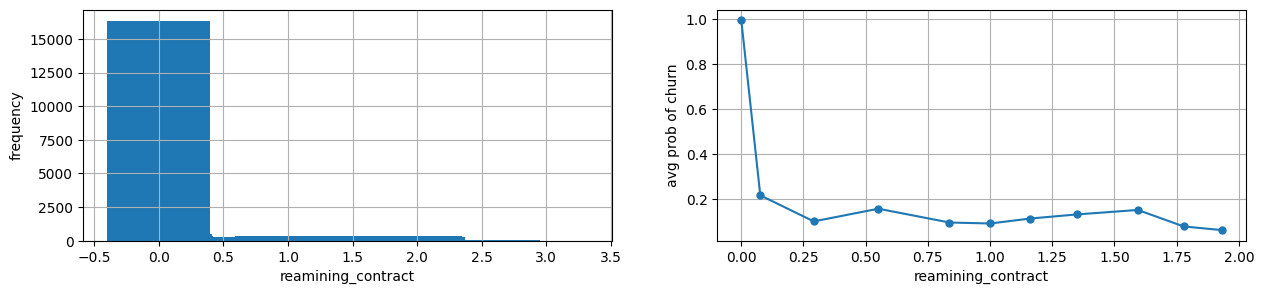




download_avg (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,71893.0,43.689911,63.405963,0.0,6.7,27.8,60.5,4415.2,0.005272




download_avg (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_avg_gr     -1.0           0.0          1.0          2.0   \
churn        count  381.0  10941.000000  6096.000000  6095.000000   
             mean     0.0      0.997898     0.802986     0.710418   
download_avg min      NaN      0.000000     0.100000     5.700000   
             max      NaN      0.000000     5.700000    12.100000   
             mean     NaN      0.000000     2.827510     8.915488   

download_avg_gr            3.0          4.0          5.0          6.0   \
churn        count  6095.000000  6095.000000  6095.000000  6096.000000   
             mean      0.609024     0.521247     0.459065     0.411253   
download_avg min      12.100000    19.100000    26.900000    35.900000   
             max      19.100000    26.900000    35.900000    46.200000   
             mean     15.540263    22.877851    31.315554    40.944948   

download_avg_gr            7.0          8.0          9.0          10.0  
churn        count  6095.000000  6095.000000  6095.000000  6095.000000  
             mean      0.377358     0.340935     0.297785     0.249385  
download_avg min      46.200000    59.700000    78.800000   112.200000  
             max      59.700000    78.800000   112.100000  4415.200000  
             mean     52.692945    68.643134    93.340361   178.235012

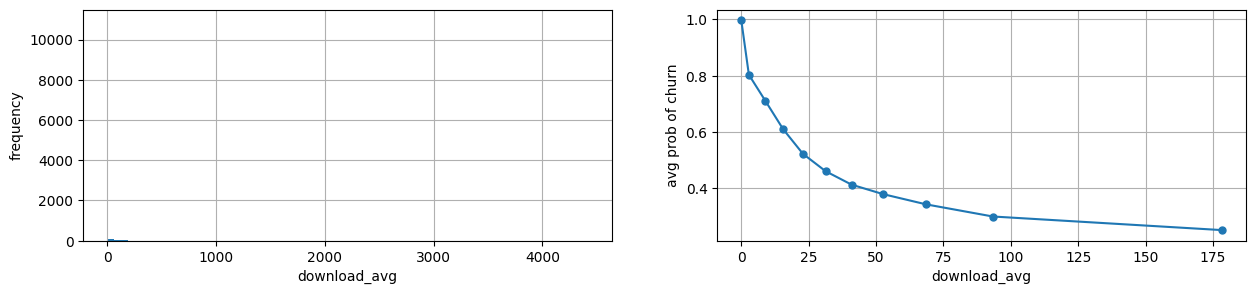




upload_avg (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,71893.0,4.192076,9.818896,0.0,0.5,2.1,4.8,453.3,0.005272




upload_avg (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


upload_avg_gr     -1.0           0.0          1.0          2.0          3.0   \
churn      count  381.0  11674.000000  6022.000000  6022.000000  6022.000000   
           mean     0.0      0.989978     0.784955     0.686981     0.595483   
upload_avg min      NaN      0.000000     0.100000     0.500000     1.000000   
           max      NaN      0.000000     0.500000     1.000000     1.500000   
           mean     NaN      0.000000     0.279326     0.719412     1.209665   

upload_avg_gr            4.0          5.0          6.0          7.0   \
churn      count  6022.000000  6022.000000  6022.000000  6022.000000   
           mean      0.503819     0.439057     0.399369     0.353039   
upload_avg min       1.500000     2.100000     2.800000     3.700000   
           max       2.100000     2.800000     3.700000     4.800000   
           mean      1.766755     2.418482     3.215012     4.221737   

upload_avg_gr            8.0          9.0          10.0  
churn      count  6022.000000  6022.000000  6021.000000  
           mean      0.331285     0.299568     0.337984  
upload_avg min       4.800000     6.600000    10.000000  
           max       6.600000    10.000000   453.300000  
           mean      5.631617     8.045085    22.543298

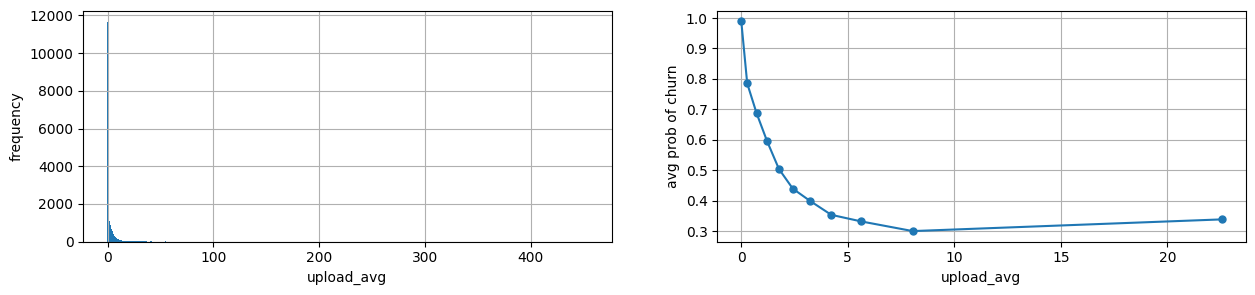

In [ ]:
analyse_continuous_features(work_df, continuous_initial, 'churn')

*   subscription_age - відємні значення в 0, нормалізуємо
*   bill_avg - нормалізуємо
*   reamining_contract - NaN в 0, перетворюємо в категоріальну(0 / 1)
*   download_avg, upload_avg - Nan замінюємо на середні значення, нормалізуємо

In [ ]:
work_df.loc[work_df['subscription_age'] < 0, 'subscription_age'] = 0

work_df['reamining_contract'].fillna(0, inplace=True)
work_df.loc[work_df['reamining_contract'] > 0, 'reamining_contract'] = 1

for feature in ['download_avg', 'upload_avg']:
  work_df[feature].fillna(work_df[feature].mean(), inplace=True)

normalizations_dict = {}
for feature in ['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']:
  work_df[f'{feature}_norm'] = (work_df[feature] - work_df[feature].min()) / (work_df[feature].max() - work_df[feature].min())
  normalizations_dict[feature] = {'min': work_df[feature].min(), 'max': work_df[feature].max()}


In [ ]:
discrete_additional = ['service_failure_count_0', 'service_failure_count_1', 'service_failure_count_2', 'service_failure_count_3', 'service_failure_count_4', 'download_over_limit_0',
                       'download_over_limit_1', 'download_over_limit_2', 'download_over_limit_3', 'download_over_limit_4', 'download_over_limit_5', 'download_over_limit_6', 'download_over_limit_7',
                       'reamining_contract']
continuous_additial = ['subscription_age_norm', 'bill_avg_norm', 'download_avg_norm','upload_avg_norm']

service_failure_count_0 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.835805,0.370455,0.0,1.0,1.0,1.0,1.0,0.0




service_failure_count_0 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count_0             0            1
churn count              11867.000000  60407.00000
      mean                   0.563411      0.55232

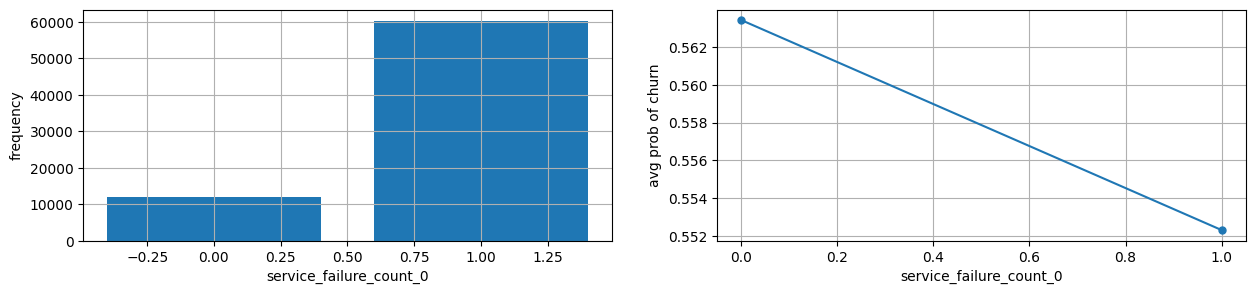




service_failure_count_1 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.106055,0.30791,0.0,0.0,0.0,0.0,1.0,0.0




service_failure_count_1 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count_1             0            1
churn count              64609.000000  7665.000000
      mean                   0.555449     0.543118

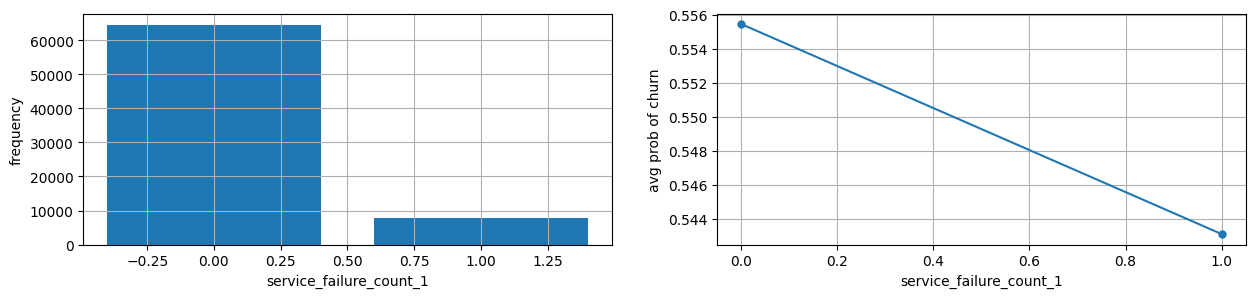




service_failure_count_2 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.03394,0.181077,0.0,0.0,0.0,0.0,1.0,0.0




service_failure_count_2 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count_2             0            1
churn count              69821.000000  2453.000000
      mean                   0.552799     0.592336

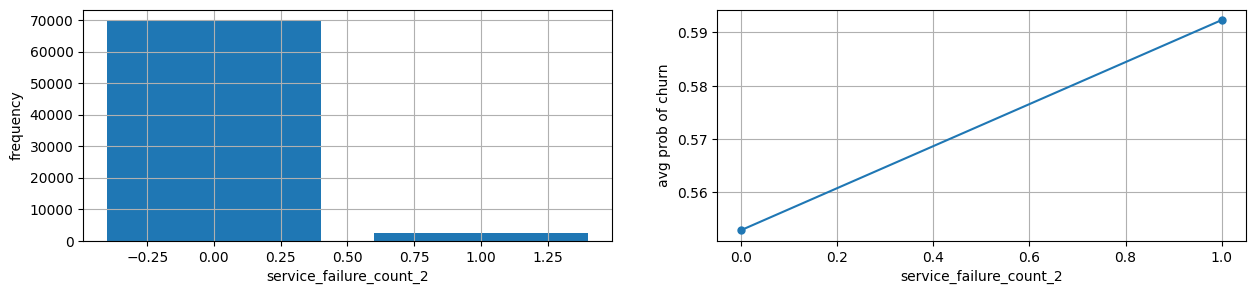




service_failure_count_3 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.012466,0.110956,0.0,0.0,0.0,0.0,1.0,0.0




service_failure_count_3 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count_3             0           1
churn count              71373.000000  901.000000
      mean                   0.553935    0.570477

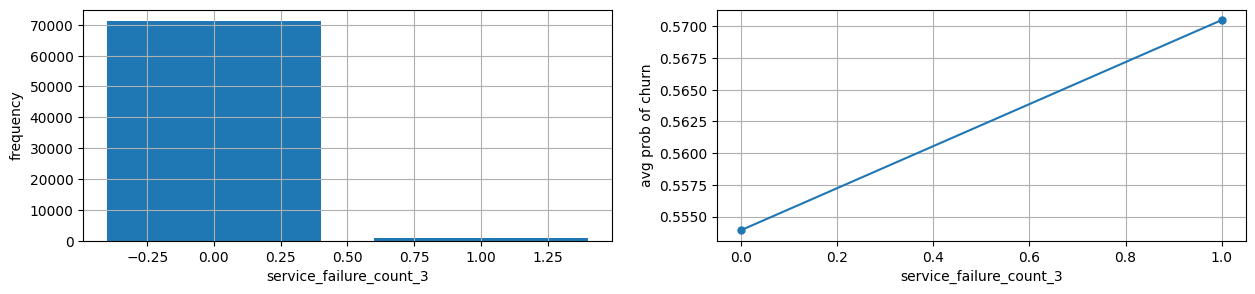




service_failure_count_4 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.011733,0.107683,0.0,0.0,0.0,0.0,1.0,0.0




service_failure_count_4 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


service_failure_count_4             0          1
churn count              71426.000000  848.00000
      mean                   0.552936    0.65566

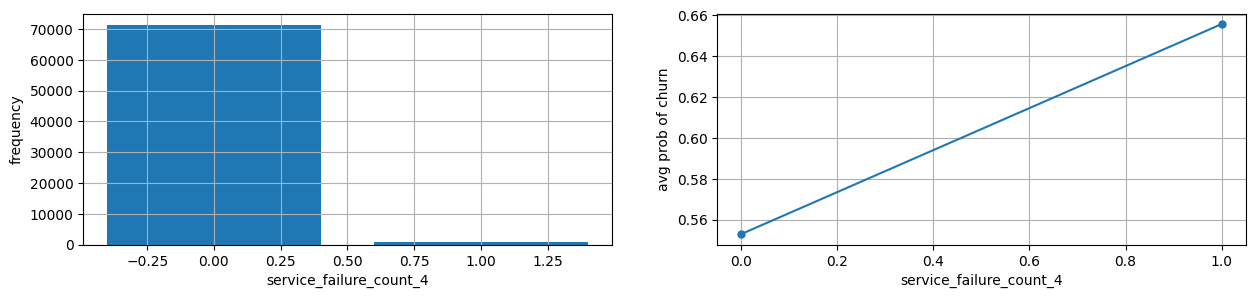




download_over_limit_0 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.946025,0.22597,0.0,1.0,1.0,1.0,1.0,0.0




download_over_limit_0 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_0            0             1
churn count            3901.000000  68373.000000
      mean                0.884645      0.535284

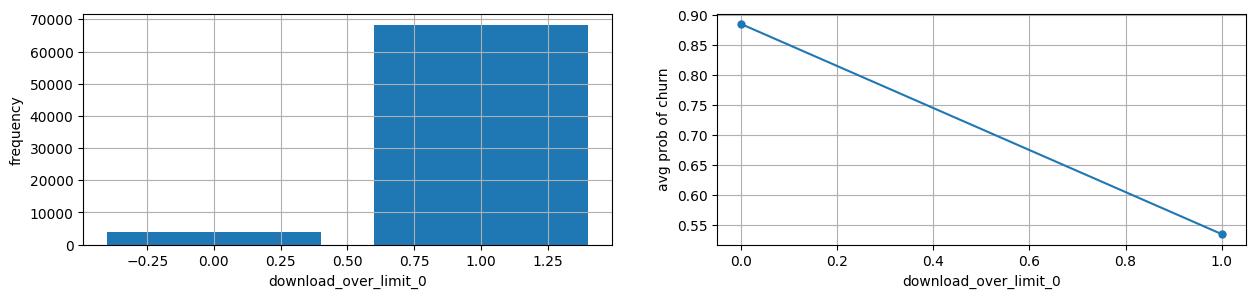




download_over_limit_1 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.010599,0.102403,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_1 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_1            0           1
churn count            71508.00000  766.000000
      mean                 0.55219    0.736292

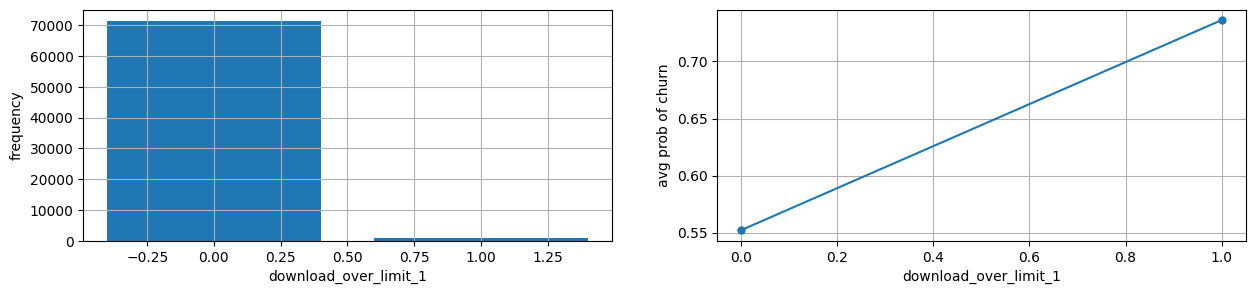




download_over_limit_2 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.007748,0.087683,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_2 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_2             0         1
churn count            71714.000000  560.0000
      mean                 0.552124    0.8125

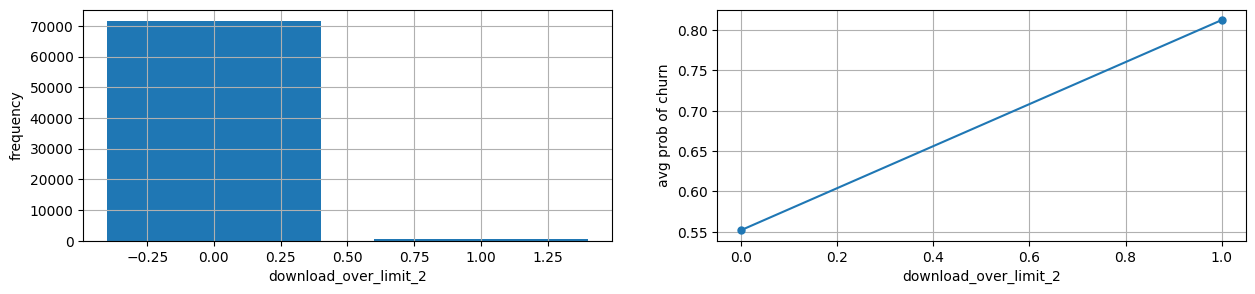




download_over_limit_3 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.00689,0.082723,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_3 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_3             0           1
churn count            71776.000000  498.000000
      mean                 0.551772    0.895582

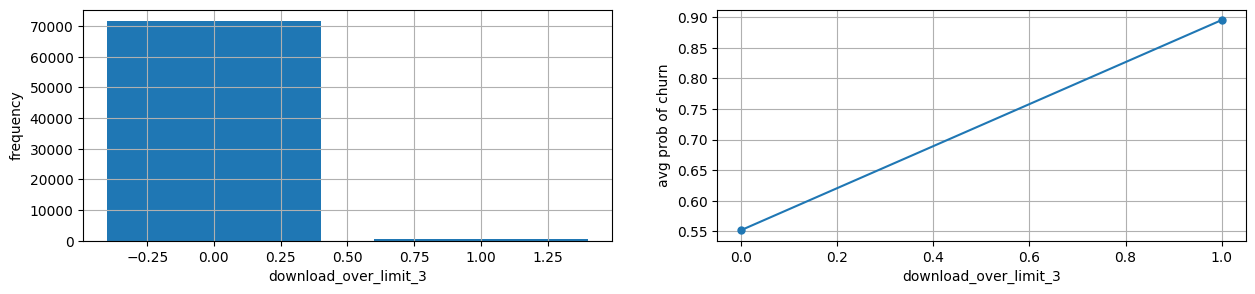




download_over_limit_4 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.006309,0.079181,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_4 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_4             0           1
churn count            71818.000000  456.000000
      mean                 0.551756    0.929825

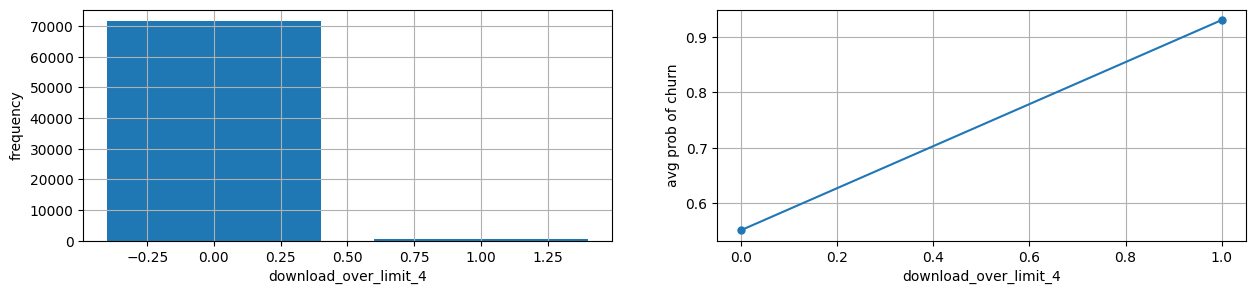




download_over_limit_5 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.005936,0.076815,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_5 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_5             0           1
churn count            71845.000000  429.000000
      mean                 0.551924    0.925408

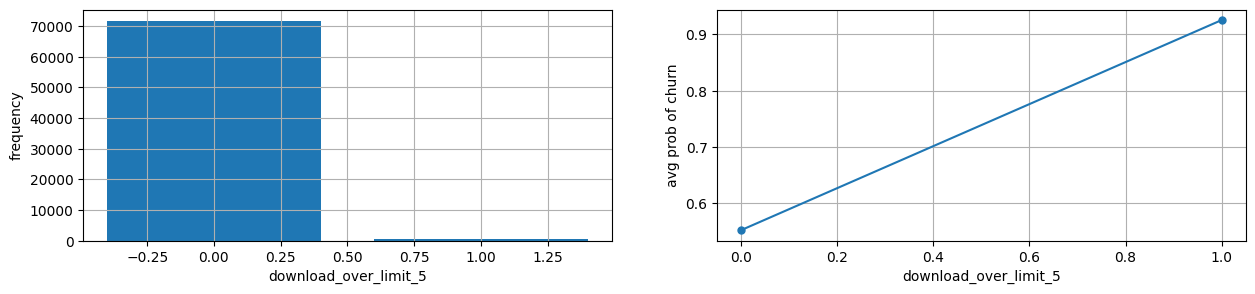




download_over_limit_6 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.009519,0.097102,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_6 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_6             0           1
churn count            71586.000000  688.000000
      mean                 0.550219    0.962209

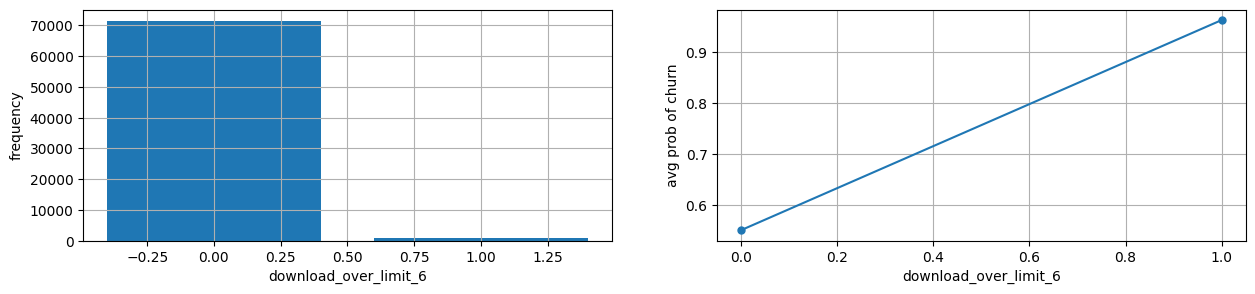




download_over_limit_7 (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.006973,0.083216,0.0,0.0,0.0,0.0,1.0,0.0




download_over_limit_7 (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_over_limit_7             0           1
churn count            71770.000000  504.000000
      mean                 0.551024    0.998016

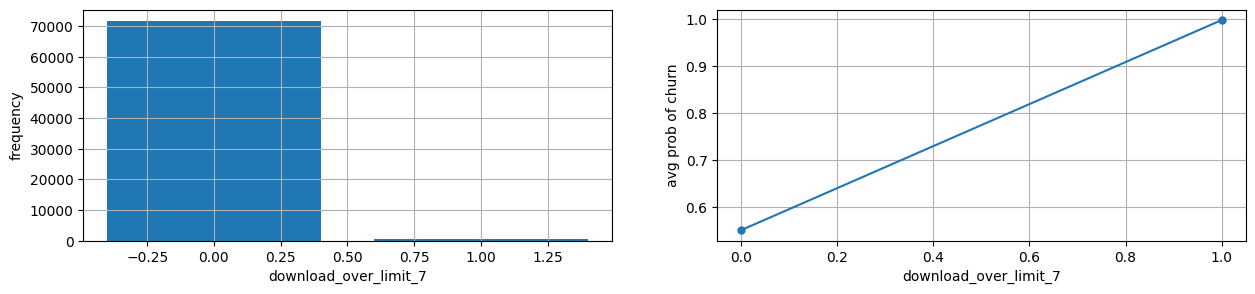




reamining_contract (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.475122,0.499384,0.0,0.0,0.0,1.0,1.0,0.0




reamining_contract (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


reamining_contract           0.0          1.0
churn count         37935.000000  34339.00000
      mean              0.949255      0.11765

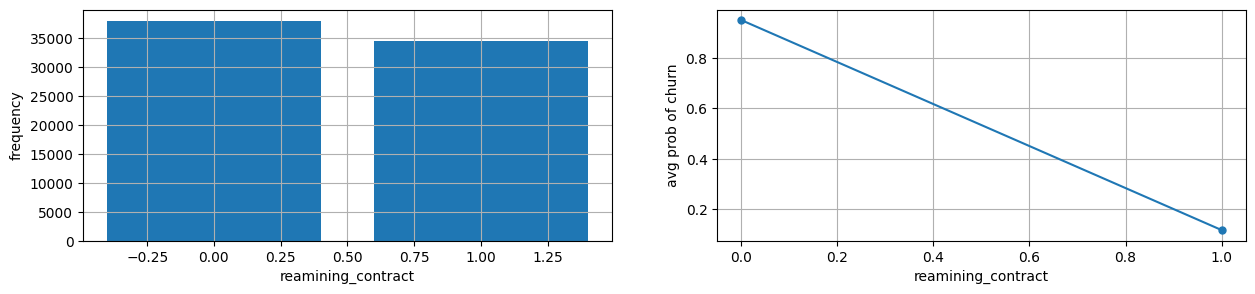

In [ ]:
analyse_discrete_features(work_df, discrete_additional, 'churn')

subscription_age_norm (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.19141,0.158984,0.0,0.072656,0.154687,0.257812,1.0,0.0




subscription_age_norm (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


subscription_age_norm_gr           0.0          1.0          2.0   \
churn                 count  279.000000  7200.000000  7199.000000   
                      mean     0.867384     0.423611     0.597444   
subscription_age_norm min      0.000000     0.000781     0.032031   
                      max      0.000000     0.032031     0.060156   
                      mean     0.000000     0.015421     0.047012   

subscription_age_norm_gr            3.0          4.0          5.0   \
churn                 count  7200.000000  7199.000000  7200.000000   
                      mean      0.559028     0.579664     0.660000   
subscription_age_norm min       0.060156     0.084375     0.119531   
                      max       0.084375     0.119531     0.154687   
                      mean      0.072851     0.100261     0.139930   

subscription_age_norm_gr            6.0          7.0          8.0   \
churn                 count  7199.000000  7200.000000  7199.000000   
                      mean      0.747326     0.593333     0.539797   
subscription_age_norm min       0.154687     0.182031     0.231250   
                      max       0.182031     0.231250     0.304688   
                      mean      0.164977     0.206823     0.262519   

subscription_age_norm_gr            9.0          10.0  
churn                 count  7200.000000  7199.000000  
                      mean      0.539861     0.289207  
subscription_age_norm min       0.304688     0.443750  
                      max       0.443750     1.000000  
                      mean      0.361922     0.549826

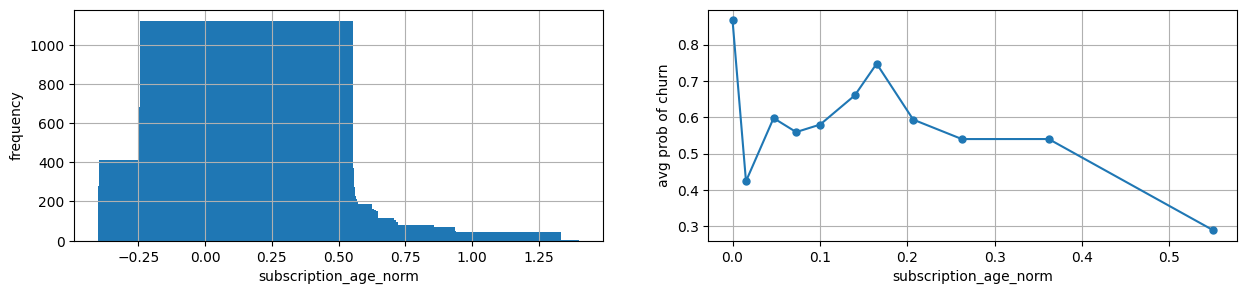




bill_avg_norm (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.046656,0.03255,0.0,0.03202,0.046798,0.054187,1.0,0.0




bill_avg_norm (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


bill_avg_norm_gr            0.0          1.0          2.0          3.0   \
churn         count  5173.000000  6711.000000  6710.000000  6710.000000   
              mean      0.926542     0.551036     0.350373     0.365574   
bill_avg_norm min       0.000000     0.002463     0.029557     0.032020   
              max       0.000000     0.029557     0.032020     0.036946   
              mean      0.000000     0.020900     0.030505     0.034743   

bill_avg_norm_gr            4.0          5.0          6.0          7.0   \
churn         count  6710.000000  6710.000000  6710.000000  6710.000000   
              mean      0.457079     0.593890     0.512072     0.492996   
bill_avg_norm min       0.036946     0.044335     0.049261     0.051724   
              max       0.044335     0.049261     0.051724     0.054187   
              mean      0.039632     0.046633     0.050543     0.053372   

bill_avg_norm_gr            8.0          9.0          10.0  
churn         count  6710.000000  6710.000000  6710.000000  
              mean      0.724292     0.584799     0.622206  
bill_avg_norm min       0.054187     0.059113     0.071429  
              max       0.059113     0.071429     1.000000  
              mean      0.056491     0.062712     0.107006

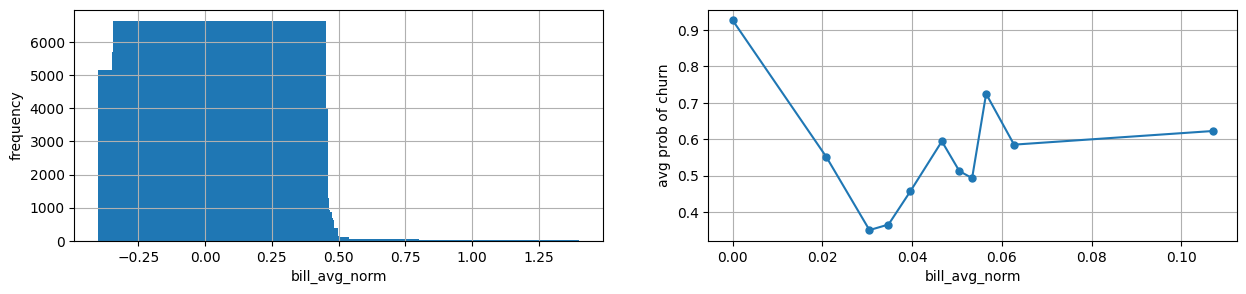




download_avg_norm (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.009895,0.014323,0.0,0.00154,0.006364,0.013635,1.0,0.0




download_avg_norm (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


download_avg_norm_gr             0.0          1.0          2.0          3.0   \
churn             count  10941.000000  6134.000000  6133.000000  6133.000000   
                  mean       0.997898     0.802413     0.709278     0.607370   
download_avg_norm min        0.000000     0.000023     0.001314     0.002763   
                  max        0.000000     0.001314     0.002763     0.004349   
                  mean       0.000000     0.000645     0.002033     0.003544   

download_avg_norm_gr            4.0          5.0          6.0          7.0   \
churn             count  6134.000000  6133.000000  6133.000000  6134.000000   
                  mean      0.519726     0.456710     0.385130     0.380502   
download_avg_norm min       0.004349     0.006138     0.008199     0.010396   
                  max       0.006138     0.008199     0.010396     0.013454   
                  mean      0.005221     0.007150     0.009318     0.011868   

download_avg_norm_gr            8.0          9.0          10.0  
churn             count  6133.000000  6133.000000  6133.000000  
                  mean      0.341921     0.297244     0.249470  
download_avg_norm min       0.013454     0.017779     0.025344  
                  max       0.017779     0.025344     1.000000  
                  mean      0.015481     0.021073     0.040276

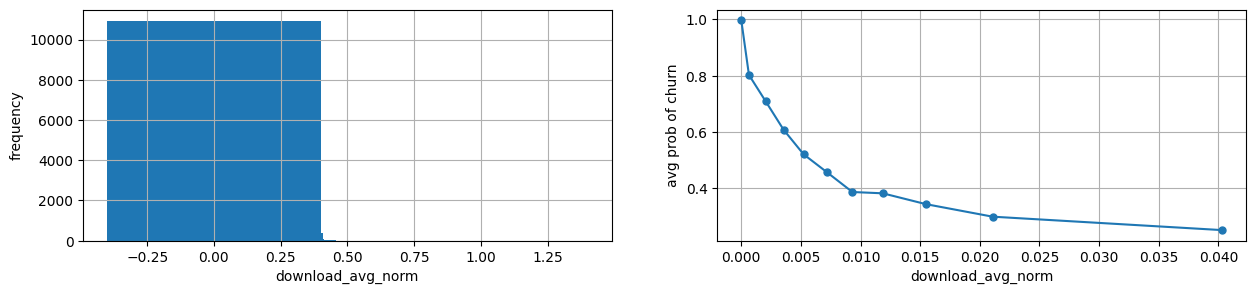




upload_avg_norm (describe) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


,count,mean,std,min,25%,50%,75%,max,part of NaN
0,72274.0,0.009248,0.021604,0.0,0.001103,0.004633,0.010589,1.0,0.0




upload_avg_norm (frequency / avg prob of churn) * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *


upload_avg_norm_gr             0.0          1.0          2.0          3.0   \
churn           count  11674.000000  6060.000000  6060.000000  6060.000000   
                mean       0.989978     0.785644     0.681518     0.598185   
upload_avg_norm min        0.000000     0.000221     0.001103     0.002206   
                max        0.000000     0.001103     0.002206     0.003309   
                mean       0.000000     0.000619     0.001598     0.002686   

upload_avg_norm_gr            4.0          5.0          6.0          7.0   \
churn           count  6060.000000  6060.000000  6060.000000  6060.000000   
                mean      0.501650     0.436469     0.400330     0.327888   
upload_avg_norm min       0.003309     0.004633     0.006177     0.008162   
                max       0.004633     0.006177     0.008162     0.010589   
                mean      0.003927     0.005379     0.007161     0.009328   

upload_avg_norm_gr            8.0          9.0          10.0  
churn           count  6060.000000  6060.000000  6060.000000  
                mean      0.333168     0.299505     0.337459  
upload_avg_norm min       0.010589     0.014560     0.022060  
                max       0.014560     0.022060     1.000000  
                mean      0.012362     0.017680     0.049553

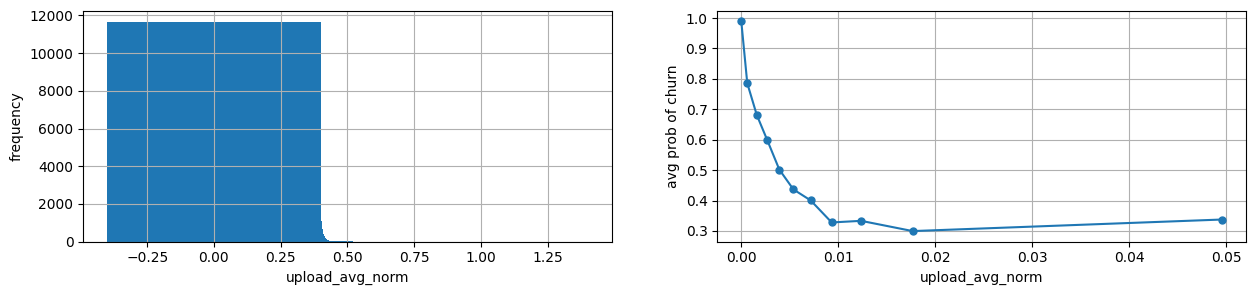

In [ ]:
analyse_continuous_features(work_df, continuous_additial, 'churn')

<Axes: >

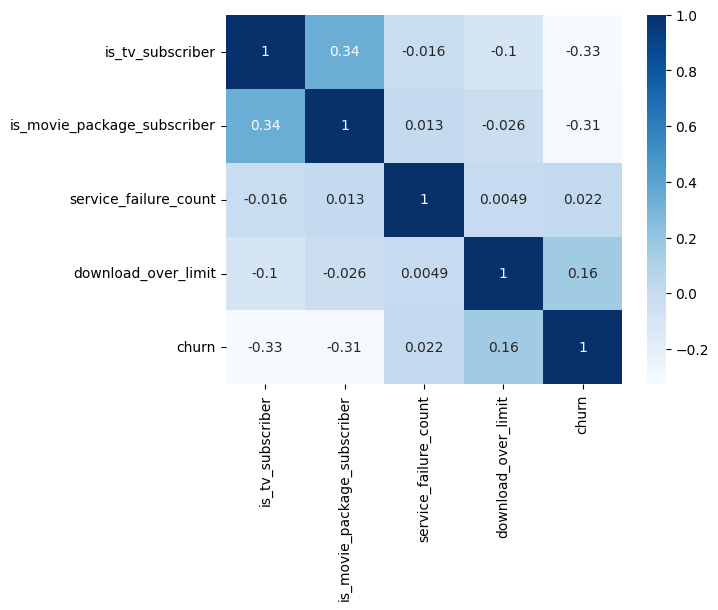

In [ ]:
corr = work_df[discrete_initial + ['churn']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

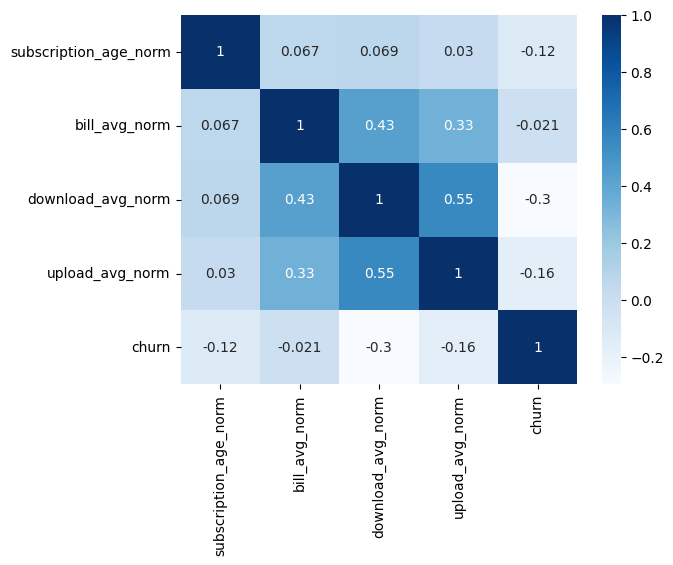

In [ ]:
corr = work_df[continuous_additial + ['churn']].corr()
sns.heatmap(corr, cmap="Blues", annot=True)

на основі аналізу кореляці з фін набору параметрів викидаємо upload_avg

In [ ]:
work_df.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn',
       'service_failure_count_0', 'service_failure_count_1',
       'service_failure_count_2', 'service_failure_count_3',
       'service_failure_count_4', 'download_over_limit_0',
       'download_over_limit_1', 'download_over_limit_2',
       'download_over_limit_3', 'download_over_limit_4',
       'download_over_limit_5', 'download_over_limit_6',
       'download_over_limit_7', 'subscription_age_gr', 'bill_avg_gr',
       'reamining_contract_gr', 'download_avg_gr', 'upload_avg_gr',
       'subscription_age_norm', 'bill_avg_norm', 'download_avg_norm',
       'upload_avg_norm', 'subscription_age_norm_gr', 'bill_avg_norm_gr',
       'download_avg_norm_gr', 'upload_avg_norm_gr'],
      dtype='object')

In [ ]:
final_df = work_df[['is_tv_subscriber', 'is_movie_package_subscriber', 'reamining_contract', 'service_failure_count_0', 'service_failure_count_1', 'service_failure_count_2', 'service_failure_count_3',
                    'service_failure_count_4', 'download_over_limit_0', 'download_over_limit_1', 'download_over_limit_2', 'download_over_limit_3', 'download_over_limit_4', 'download_over_limit_5',
                    'download_over_limit_6', 'download_over_limit_7','subscription_age_norm', 'bill_avg_norm', 'download_avg_norm', 'churn']]

final_df.to_csv('/content/drive/MyDrive/final_df.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.loc[:, 'is_tv_subscriber' : 'download_avg_norm'], final_df['churn'], test_size = 0.3, random_state = 42, shuffle = True)